In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [21]:
df=pd.read_csv("/content/drive/MyDrive/riceClassification.csv")
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


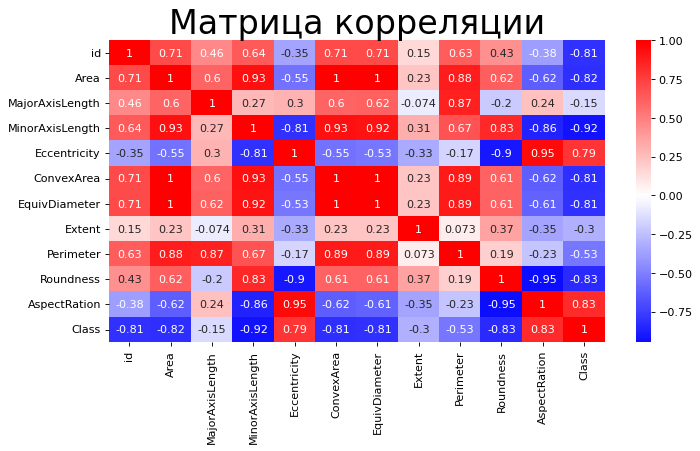

In [22]:
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='bwr', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [73]:
df["Class"].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [74]:
df = df.drop(["MajorAxisLength"],axis = 1)

In [23]:
df.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [28]:
df = df.drop(['id'],axis = 1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [75]:
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [39]:
from sklearn.linear_model import LogisticRegression

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [77]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
print(model.coef_[0][0], "*Area +",model.coef_[0][1],"*MajorAxislength +",model.coef_[0][2],"*MinorAxisLength +",model.coef_[0][3],"*Eccenticity +",model.coef_[0][4],"*ConvexArea +",model.coef_[0][5],"*EquivDiameter +",model.coef_[0][6],"*extent +", model.coef_[0][7] ,"*Perimeter +",model.coef_[0][8],"*Roundness +",model.coef_[0][9],"*AspectRation")

Веса всех признаков (w1):  [[ 0.0058427  -0.31431389 -0.00078526 -0.01334968 -0.11763408 -0.00308815
   0.23960653 -0.00478192  0.01352197]]
Свободный коэффицент уравнения w0: [-0.00260681]


IndexError: ignored

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,pred)

array([[2433,   44],
       [  19, 2960]])

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 2490
FP: 41
FN: 25
TP: 2900


In [49]:
(tp + tn) / (tp + tn + fp + fn)

0.9879032258064516

In [57]:
accuracy_score(y_test, pred)


0.9879032258064516

In [51]:
recall = tp / (tp + fn)
recall

0.9914529914529915

In [58]:
recall_score(y_test, pred)


0.9914529914529915

In [53]:
precision = tp / (tp + fp)
precision

0.9860591635498129

In [60]:
precision_score(y_test, pred)


0.9860591635498129

In [55]:
f1 = 2 * precision * recall / (recall + precision)
f1

0.9887487214456189

In [61]:
f1_score(y_test, pred)


0.9887487214456189

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 2433
FP: 44
FN: 19
TP: 2960


In [81]:
accuracy_score(y_test, pred)

0.9884530791788856

In [82]:
recall_score(y_test, pred)

0.9936220208123532

In [83]:
precision_score(y_test, pred)

0.9853528628495339

In [84]:
f1_score(y_test, pred)

0.9894701654688284

Все метрики приблизительно равны 1- результат практически идеальный

